In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Usuario\Downloads\all_faults_dataset\all_faults_dataset.csv",sep=",")
df

,Relay,Scenario,inside,R,X,V,I,dispatch_scenario,faulted_line,rel_location,Rf,fault_type
0,Relay 01 - 02,Line 01 - 02_1.0_0_3rst,1,0.041659,0.489193,0.014439,5.857787,Scenario1,Line 01 - 02,1.0,0.0,3rst
1,Relay 01 - 02,Line 01 - 02_1.0_2.5_3rst,1,3.861041,0.711635,0.113567,5.761720,Scenario1,Line 01 - 02,1.0,2.5,3rst
2,Relay 01 - 02,Line 01 - 02_1.0_5_3rst,1,7.708948,0.930964,0.218630,5.608261,Scenario1,Line 01 - 02,1.0,5.0,3rst
3,Relay 01 - 02,Line 01 - 02_1.0_7.5_3rst,1,11.585692,1.147093,0.316192,5.409643,Scenario1,Line 01 - 02,1.0,7.5,3rst
4,Relay 01 - 02,Line 01 - 02_1.0_10_3rst,1,15.491589,1.359930,0.404407,5.179814,Scenario1,Line 01 - 02,1.0,10.0,3rst
...,...,...,...,...,...,...,...,...,...,...,...,...
2006395,Relay 39 - 09,Line 25 - 26_99_0_3rst,0,-329.916130,407.392716,1.003740,0.381875,Scenario9,Line 25 - 26,99.0,0.0,3rst
2006396,Relay 39 - 09,Line 25 - 26_99_2.5_3rst,0,-327.687596,457.900860,1.004788,0.355860,Scenario9,Line 25 - 26,99.0,2.5,3rst
2006397,Relay 39 - 09,Line 25 - 26_99_5_3rst,0,-329.307375,513.125784,1.006145,0.329054,Scenario9,Line 25 - 26,99.0,5.0,3rst
2006398,Relay 39 - 09,Line 25 - 26_99_7.5_3rst,0,-335.913996,573.203691,1.007691,0.302415,Scenario9,Line 25 - 26,99.0,7.5,3rst


In [3]:
df=df[df["dispatch_scenario"]=="Scenario1"]
X = df[["Relay", "R", "X", "V", "I"]]
X.loc[:, "R"] = df[["R"]].clip(lower=-100, upper=100)
X.loc[:, "X"] = df[["X"]].clip(lower=-100, upper=100)
y = df["inside"]

le = LabelEncoder()
X.loc[:, "Relay"] = le.fit_transform(X["Relay"]).reshape(-1, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [8]:
import numpy as np
from sklearn.model_selection import GridSearchCV
# Creamos la grilla con los parámetros a seleccionar
param_grid = { 
    'criterion': ['gini', 'entropy'],      
    'max_depth': [20, 30 ,40, 60, 80],            # Profundidad máxima del árbol
    'min_samples_split': [5, 15, 20],        # Mínimo de muestras necesarias para dividir el nodo
    'min_samples_leaf': [1,2,6],          # Mínimo de muestras por hoja
    'max_features': [None, 'sqrt', 'log2'] # Número máximo de características a considerar en cada división
}

# Definimos el clasificador base
base_estimator = DecisionTreeClassifier(random_state=0)

# Realizamos la búsqueda de los hiperparámetros
dt_gridSearch = GridSearchCV(base_estimator, param_grid)

# Entrenamos el modelo
dt_gridSearch.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40, 60, 80],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 6],
                         'min_samples_split': [5, 15, 20]})

In [9]:
#Podemos ver que parametros fueron los seleccionados
dt_gridSearch.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

Accuracy:  0.9994429590017825


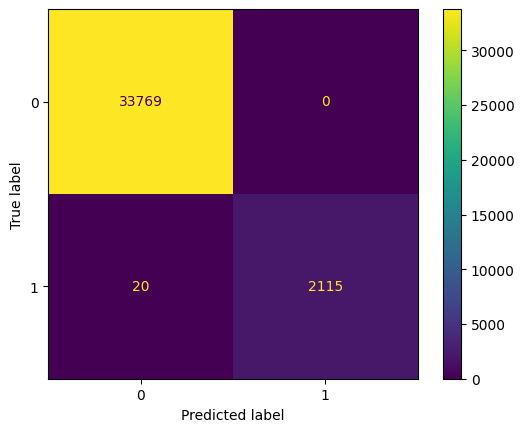

In [10]:
y_pred = dt_gridSearch.best_estimator_.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt_gridSearch.best_estimator_.classes_)
disp.plot()